# ________________________ PROJECT - 1 ___________________________
##   TOP 10 MUSIC RECOMMENDATION 

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# read the dataset
df=pd.read_csv("dataset.csv")

In [ ]:
music_df=df.copy()

In [ ]:
music_df.head(5)

user_id    song_id  spotify_popularity                  track_name  \
0  3720277.0    32192.0                87.0                      Comedy   
1  3720277.0     6801.0                45.0            Ghost - Acoustic   
2  3720277.0    31643.0                62.0              To Begin Again   
3  3720277.0  1864239.0                72.0  Can't Help Falling In Love   
4  3720277.0    38804.0                73.0                     Hold On   

   danceability  energy  key  mode  acousticness  instrumentalness  valence  \
0         0.676  0.4610  1.0   0.0        0.0322          0.000001    0.715   
1         0.420  0.1660  1.0   1.0        0.9240          0.000006    0.267   
2         0.438  0.3590  0.0   1.0        0.2100          0.000000    0.120   
3         0.266  0.0596  0.0   1.0        0.9050          0.000071    0.143   
4         0.618  0.4430  2.0   1.0        0.4690          0.000000    0.167   

     tempo  time_signature track_genre  Rating  
0   87.917             4.0    acoustic     5.0  
1   77.489             4.0    acoustic     5.0  
2   76.332             4.0    acoustic     4.5  
3  181.740             3.0    acoustic     4.0  
4  119.949             4.0    acoustic     5.0

In [ ]:
music_df.tail(5)

user_id    song_id  spotify_popularity                track_name  \
6996  3728657.0  1835872.0                56.0  Antichrist Siege Machine   
6997  3728700.0  4105239.0                29.0    The Scope Of Obsession   
6998  3728657.0  1822821.0                61.0  Phantoms of Mortem Tales   
6999  3728700.0  4222632.0                62.0               Bergagasten   
7000  3728700.0    19250.0                53.0       The Pentagram Burns   

      danceability  energy  key  mode  acousticness  instrumentalness  \
6996         0.193   0.990  1.0   1.0      0.000001           0.84800   
6997         0.573   0.976  1.0   0.0      0.000046           0.02220   
6998         0.128   0.954  5.0   1.0      0.000004           0.12800   
6999         0.565   0.852  0.0   0.0      0.001290           0.00114   
7000         0.406   0.977  2.0   1.0      0.007940           0.04970   

      valence    tempo  time_signature  track_genre  Rating  
6996   0.0380  134.067             4.0  black-metal     4.0  
6997   0.3150  114.020             4.0  black-metal     3.0  
6998   0.1830  147.166             4.0  black-metal     4.5  
6999   0.5100  124.960             4.0  black-metal     4.5  
7000   0.0594  125.004             4.0  black-metal     NaN

In [ ]:
music_df.count()

user_id               6997
song_id               6997
spotify_popularity    6997
track_name            6997
danceability          6997
energy                6997
key                   6997
mode                  6997
acousticness          6997
instrumentalness      6997
valence               6997
tempo                 6997
time_signature        6997
track_genre           6997
Rating                6798
dtype: int64

# Columns Contant

#### 1: user_id: Unique identifier for each user in the dataset.
#### 2: song_id: Unique identifier for each song in the dataset.
#### 3: spotify_popularity: Popularity score of the song on Spotify.
#### 4: track_name: Name or title of the song.
#### 5: danceability: A measure of how suitable the song is for dancing.
#### 6: energy: A measure of the song's energy level.
#### 7: key: The key in which the song is composed.
#### 8: mode: The modality of the song, often represented as major (1) or minor (0).
#### 9: acousticness: A measure of how acoustic or non-electronic the song is.
#### 10: instrumentalness: A measure of how instrumental or non-vocal the song is.
#### 11: valence: A measure of the song's positivity or happiness.
#### 12: tempo: The tempo or beats per minute (BPM) of the song.
#### 13: time_signature: The time signature of the song's musical structure.
#### 14: track_genre: The genre or musical category to which the song belongs.
#### 15: Rating: User ratings or scores for the song.   add serial numbers for all poits


In [7]:
# Data information
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             6997 non-null   float64
 1   song_id             6997 non-null   float64
 2   spotify_popularity  6997 non-null   float64
 3   track_name          6997 non-null   object 
 4   danceability        6997 non-null   float64
 5   energy              6997 non-null   float64
 6   key                 6997 non-null   float64
 7   mode                6997 non-null   float64
 8   acousticness        6997 non-null   float64
 9   instrumentalness    6997 non-null   float64
 10  valence             6997 non-null   float64
 11  tempo               6997 non-null   float64
 12  time_signature      6997 non-null   float64
 13  track_genre         6997 non-null   object 
 14  Rating              6798 non-null   float64
dtypes: float64(13), object(2)
memory usage: 820.6+ KB


In [8]:
# Checking Null values
music_df.isnull().sum()

user_id                 4
song_id                 4
spotify_popularity      4
track_name              4
danceability            4
energy                  4
key                     4
mode                    4
acousticness            4
instrumentalness        4
valence                 4
tempo                   4
time_signature          4
track_genre             4
Rating                203
dtype: int64

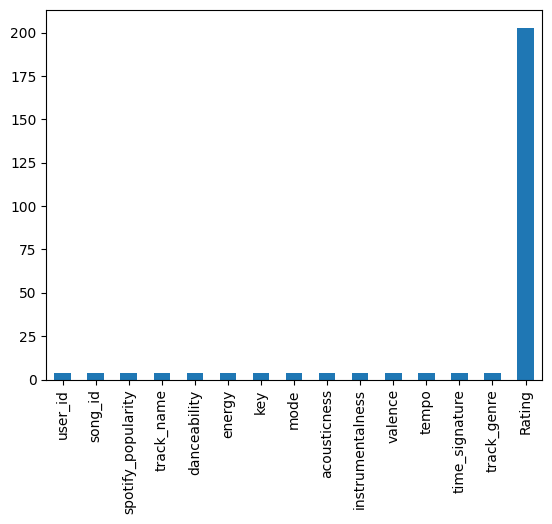

In [9]:
music_df.isnull().sum().plot.bar()
plt.show()

In [10]:
# We have null values in the data set, here we replace null values with (mean and mode)

# For objective type 
mode_value = music_df['track_genre'].mode().values[0]
music_df['track_genre'].fillna(mode_value, inplace=True)

mode_value =music_df['track_name'].mode().values[0]
music_df['track_name'].fillna(mode_value, inplace=True)


# For interger and float type
music_df['user_id'].fillna(332.476503, inplace=True)
music_df['song_id'].fillna(1506.321240, inplace=True)
music_df['spotify_popularity'].fillna(50.222667, inplace=True)
music_df['danceability'].fillna(0.502244, inplace=True)
music_df['energy'].fillna(0.628266, inplace=True)
music_df['key'].fillna(5.363013, inplace=True)
music_df['mode'].fillna(0.612977, inplace=True)
music_df['acousticness'].fillna(0.311448, inplace=True)
music_df['instrumentalness'].fillna(0.251876, inplace=True)
music_df['valence'].fillna(0.418645, inplace=True)
music_df['tempo'].fillna(121.186366, inplace=True)
music_df['time_signature'].fillna(3.873517, inplace=True)
music_df['Rating'].fillna(4.330538, inplace=True)

In [11]:
music_df.isnull().sum()

user_id               0
song_id               0
spotify_popularity    0
track_name            0
danceability          0
energy                0
key                   0
mode                  0
acousticness          0
instrumentalness      0
valence               0
tempo                 0
time_signature        0
track_genre           0
Rating                0
dtype: int64

In [12]:
music_df.describe()

user_id       song_id  spotify_popularity  danceability  \
count  7.001000e+03  7.001000e+03         7001.000000   7001.000000   
mean   3.722949e+06  2.040007e+06           50.222667      0.502244   
std    8.906899e+04  1.833931e+06           16.606862      0.183121   
min    3.324765e+02  1.200000e+02            0.000000      0.000000   
25%    3.722204e+06  7.844800e+04           41.000000      0.381000   
50%    3.725595e+06  1.841489e+06           52.000000      0.516000   
75%    3.728205e+06  4.139380e+06           62.000000      0.638000   
max    3.734809e+06  5.336437e+06           98.000000      0.974000   

            energy          key         mode  acousticness  instrumentalness  \
count  7001.000000  7001.000000  7001.000000   7001.000000       7001.000000   
mean      0.628266     5.363013     0.612977      0.311448          0.251876   
std       0.288002     3.550814     0.486965      0.359426          0.369744   
min       0.001440     0.000000     0.000000      0.000000          0.000000   
25%       0.406000     2.000000     0.000000      0.005260          0.000000   
50%       0.699000     6.000000     1.000000      0.114000          0.001140   
75%       0.882000     9.000000     1.000000      0.639000          0.627000   
max       1.000000    11.000000     1.000000      0.996000          0.993000   

           valence        tempo  time_signature       Rating  
count  7001.000000  7001.000000     7001.000000  7001.000000  
mean      0.418645   121.186366        3.873517     4.330538  
std       0.268437    30.591447        0.466761     0.944479  
min       0.000000     0.000000        0.000000     0.500000  
25%       0.185000    97.512000        4.000000     4.000000  
50%       0.382000   120.009000        4.000000     4.500000  
75%       0.637000   141.612000        4.000000     5.000000  
max       0.995000   220.081000        5.000000     5.000000

# Data set columns is having Complex type so we are coverting them into integer. 

In [13]:
# Encode item IDs to integers
from sklearn.preprocessing import LabelEncoder
item_encoder = LabelEncoder()
music_df['user_id'] = item_encoder.fit_transform(music_df['user_id'])
music_df['song_id'] = item_encoder.fit_transform(music_df['song_id'])

In [14]:
music_df.describe()

user_id      song_id  spotify_popularity  danceability  \
count  7001.000000  7001.000000         7001.000000   7001.000000   
mean    333.095986  1505.514926           50.222667      0.502244   
std     227.016770   907.851489           16.606862      0.183121   
min       0.000000     0.000000            0.000000      0.000000   
25%     119.000000   681.000000           41.000000      0.381000   
50%     355.000000  1510.000000           52.000000      0.516000   
75%     546.000000  2279.000000           62.000000      0.638000   
max     665.000000  3178.000000           98.000000      0.974000   

            energy          key         mode  acousticness  instrumentalness  \
count  7001.000000  7001.000000  7001.000000   7001.000000       7001.000000   
mean      0.628266     5.363013     0.612977      0.311448          0.251876   
std       0.288002     3.550814     0.486965      0.359426          0.369744   
min       0.001440     0.000000     0.000000      0.000000          0.000000   
25%       0.406000     2.000000     0.000000      0.005260          0.000000   
50%       0.699000     6.000000     1.000000      0.114000          0.001140   
75%       0.882000     9.000000     1.000000      0.639000          0.627000   
max       1.000000    11.000000     1.000000      0.996000          0.993000   

           valence        tempo  time_signature       Rating  
count  7001.000000  7001.000000     7001.000000  7001.000000  
mean      0.418645   121.186366        3.873517     4.330538  
std       0.268437    30.591447        0.466761     0.944479  
min       0.000000     0.000000        0.000000     0.500000  
25%       0.185000    97.512000        4.000000     4.000000  
50%       0.382000   120.009000        4.000000     4.500000  
75%       0.637000   141.612000        4.000000     5.000000  
max       0.995000   220.081000        5.000000     5.000000

In [15]:
music_df.duplicated().sum()

3

In [16]:
music_df=music_df.drop_duplicates()

# Correlation

In [17]:
# Co-relation
numeric_columns = music_df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

In [18]:
correlation_matrix

user_id   song_id  spotify_popularity  danceability  \
user_id             1.000000  0.051205            0.005080     -0.412936   
song_id             0.051205  1.000000           -0.323414     -0.029409   
spotify_popularity  0.005080 -0.323414            1.000000      0.007512   
danceability       -0.412936 -0.029409            0.007512      1.000000   
energy              0.107560  0.066058           -0.074719      0.067403   
key                -0.006787 -0.000567           -0.029264      0.035512   
mode               -0.077486  0.027696           -0.022788     -0.010884   
acousticness       -0.121034 -0.046304            0.068820     -0.046754   
instrumentalness    0.333694  0.046352           -0.001742     -0.350294   
valence            -0.384547 -0.008793           -0.001165      0.620873   
tempo               0.036491  0.025978            0.001989     -0.087664   
time_signature     -0.084930  0.006889           -0.018834      0.208545   
Rating              0.040744  0.003629           -0.007232      0.009674   

                      energy       key      mode  acousticness  \
user_id             0.107560 -0.006787 -0.077486     -0.121034   
song_id             0.066058 -0.000567  0.027696     -0.046304   
spotify_popularity -0.074719 -0.029264 -0.022788      0.068820   
danceability        0.067403  0.035512 -0.010884     -0.046754   
energy              1.000000  0.058314 -0.050337     -0.833290   
key                 0.058314  1.000000 -0.122768     -0.061337   
mode               -0.050337 -0.122768  1.000000      0.052222   
acousticness       -0.833290 -0.061337  0.052222      1.000000   
instrumentalness   -0.313850 -0.023520 -0.095254      0.290770   
valence             0.341520  0.055205 -0.011189     -0.245238   
tempo               0.233372  0.025447  0.023455     -0.204798   
time_signature      0.166912  0.025881  0.004076     -0.149138   
Rating              0.077249  0.003900 -0.032774     -0.071977   

                    instrumentalness   valence     tempo  time_signature  \
user_id                     0.333694 -0.384547  0.036491       -0.084930   
song_id                     0.046352 -0.008793  0.025978        0.006889   
spotify_popularity         -0.001742 -0.001165  0.001989       -0.018834   
danceability               -0.350294  0.620873 -0.087664        0.208545   
energy                     -0.313850  0.341520  0.233372        0.166912   
key                        -0.023520  0.055205  0.025447        0.025881   
mode                       -0.095254 -0.011189  0.023455        0.004076   
acousticness                0.290770 -0.245238 -0.204798       -0.149138   
instrumentalness            1.000000 -0.381230 -0.105051       -0.151672   
valence                    -0.381230  1.000000  0.061609        0.168946   
tempo                      -0.105051  0.061609  1.000000       -0.009101   
time_signature             -0.151672  0.168946 -0.009101        1.000000   
Rating                      0.000704  0.032953  0.012882       -0.005967   

                      Rating  
user_id             0.040744  
song_id             0.003629  
spotify_popularity -0.007232  
danceability        0.009674  
energy              0.077249  
key                 0.003900  
mode               -0.032774  
acousticness       -0.071977  
instrumentalness    0.000704  
valence             0.032953  
tempo               0.012882  
time_signature     -0.005967  
Rating              1.000000

# Visualization for Co-Relation

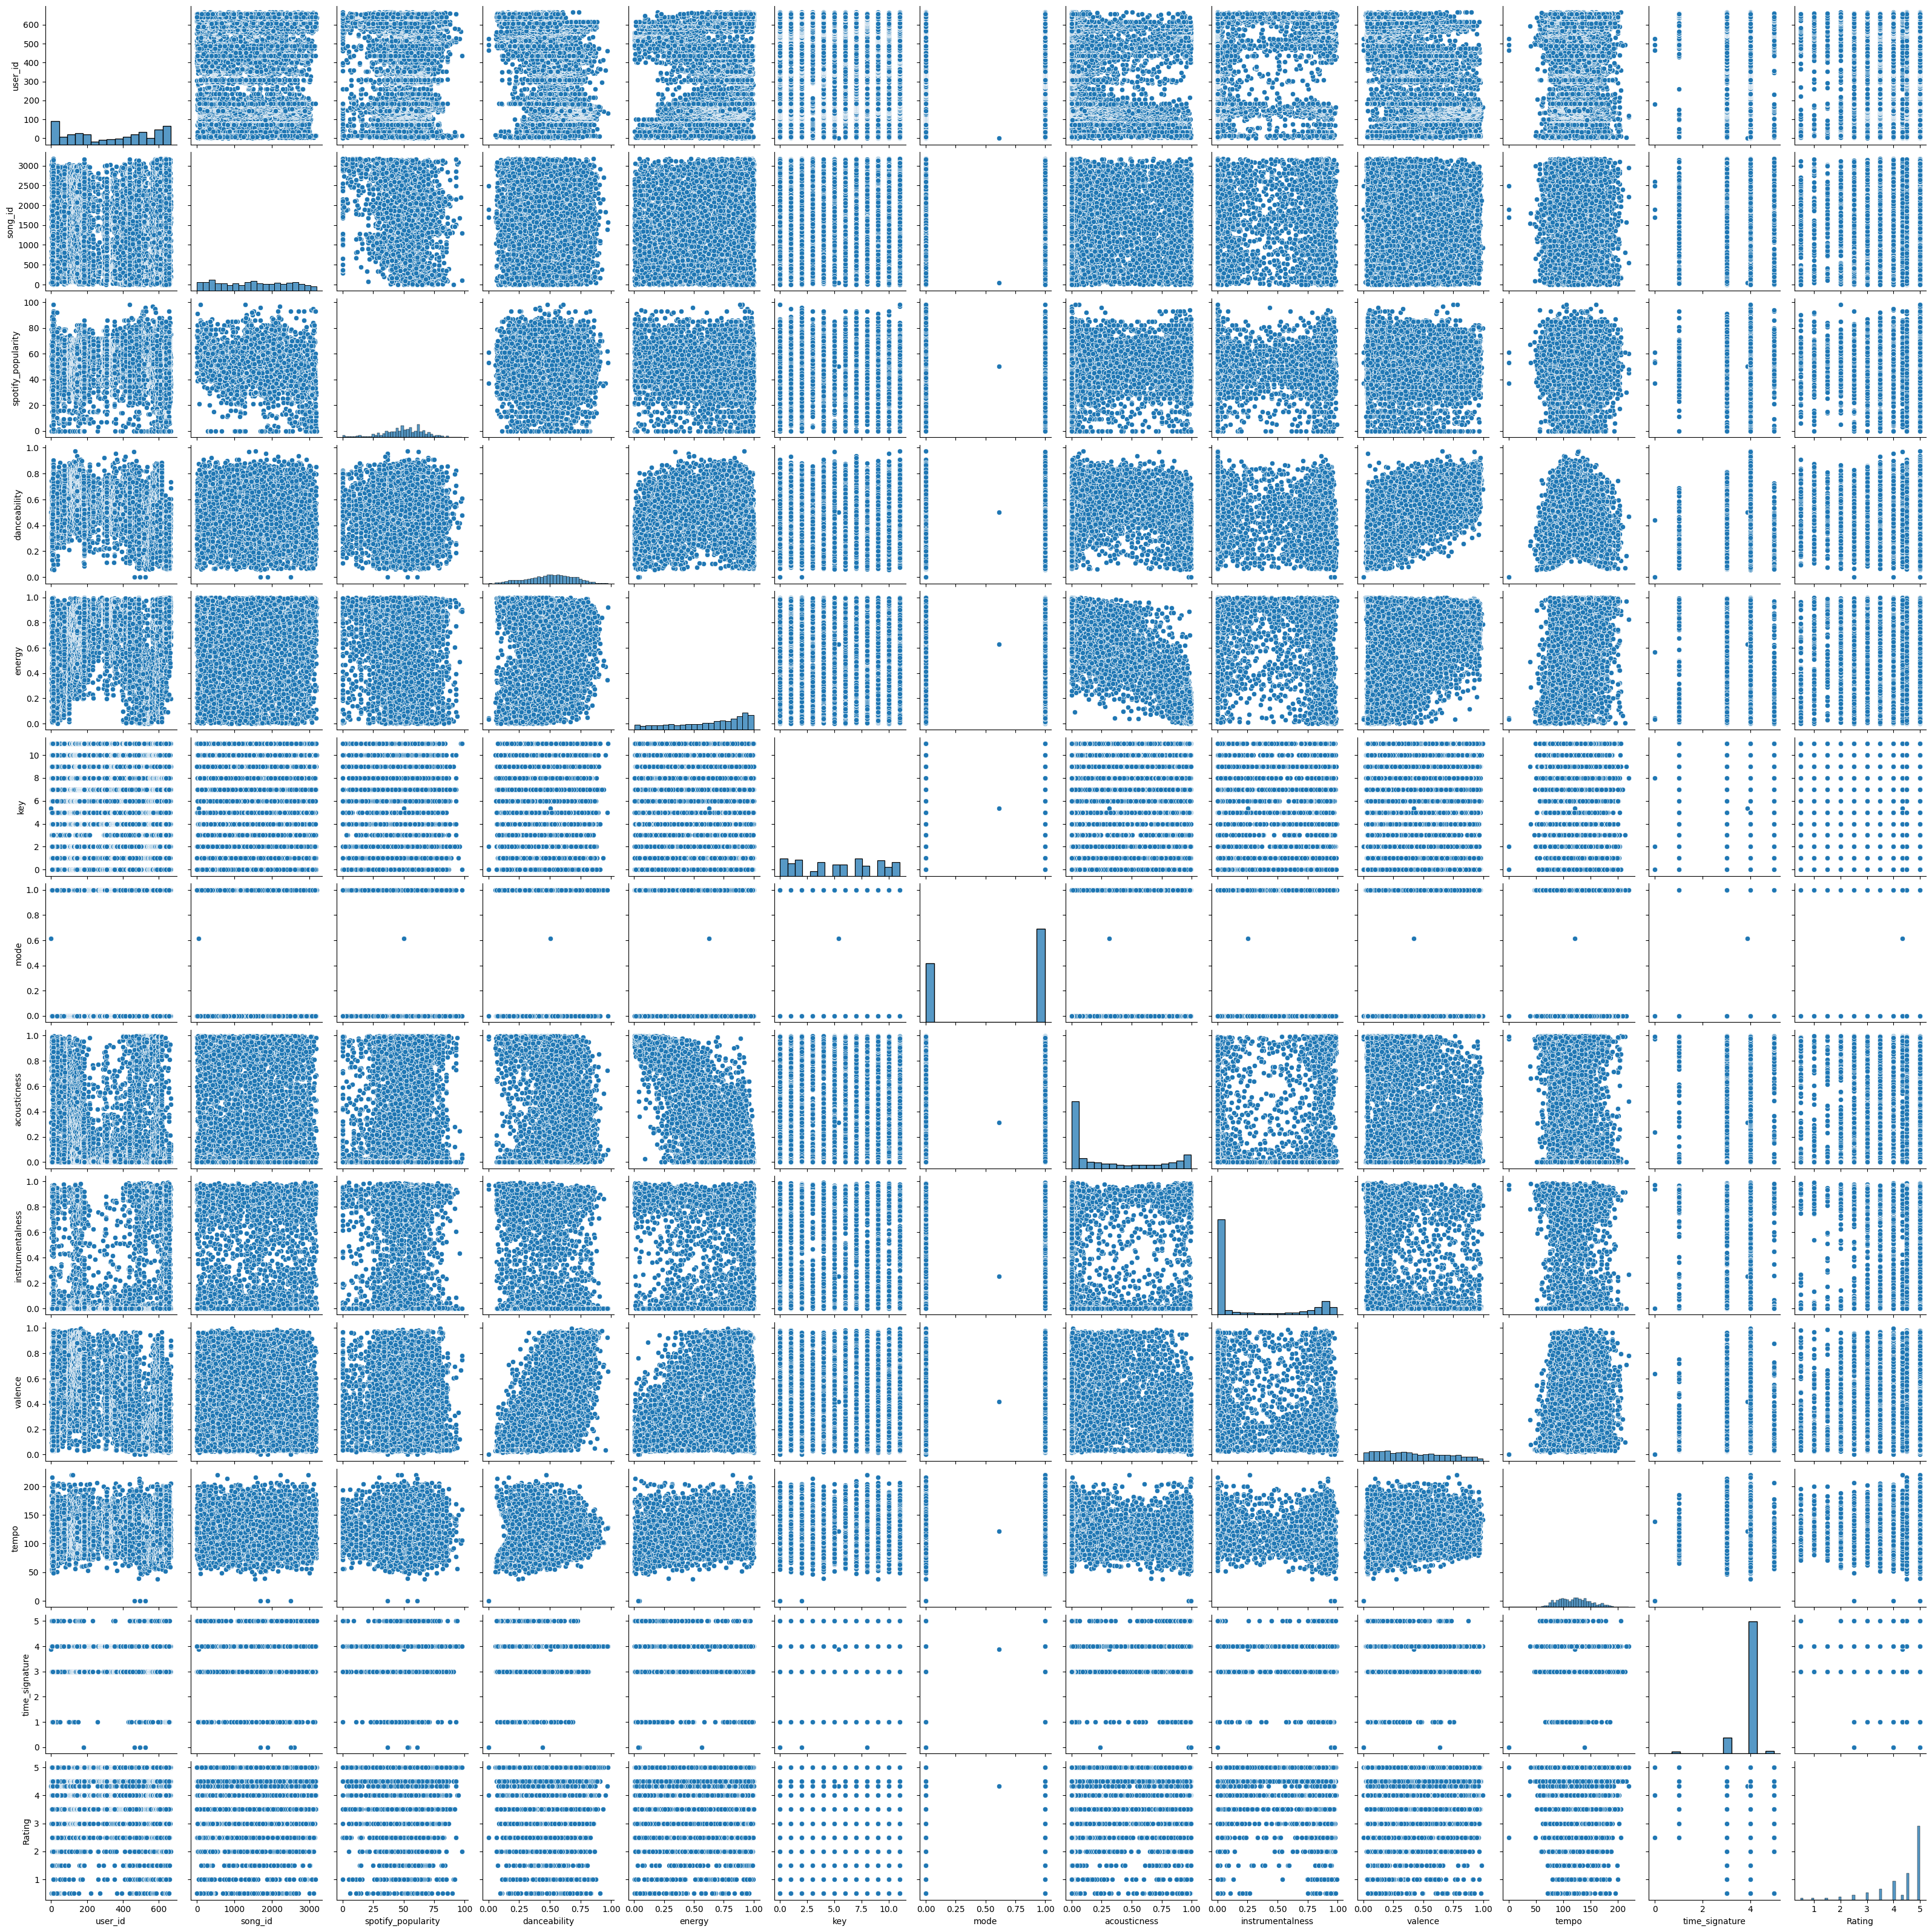

In [19]:
sns.pairplot(music_df)

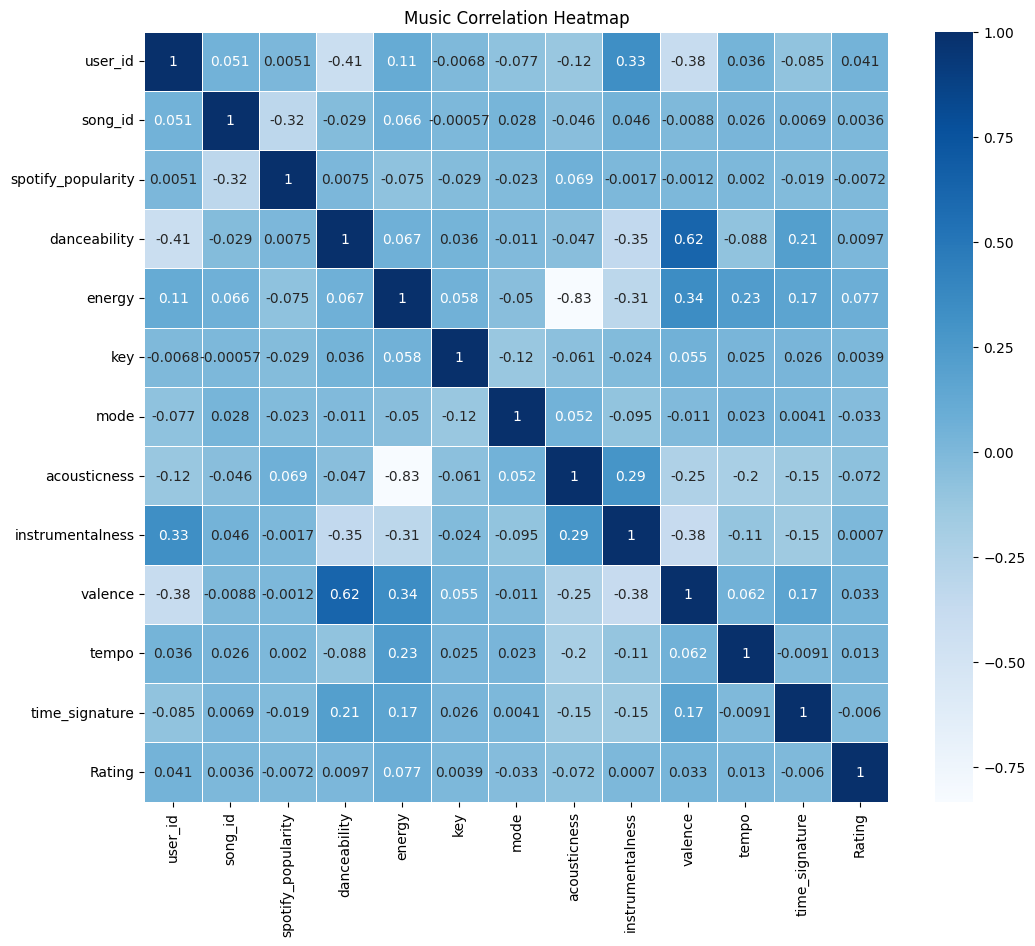

In [20]:
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Music Correlation Heatmap')
plt.show()

# Outlier Detection 

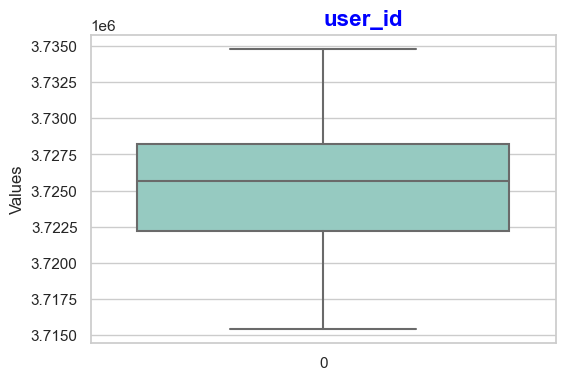

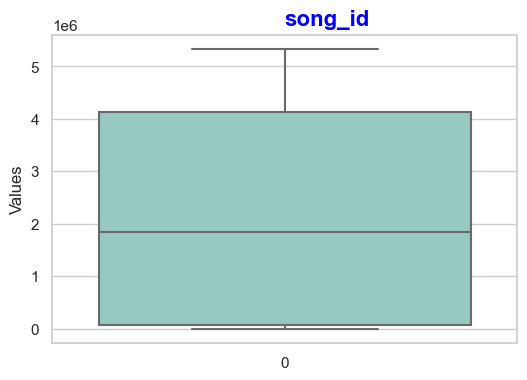

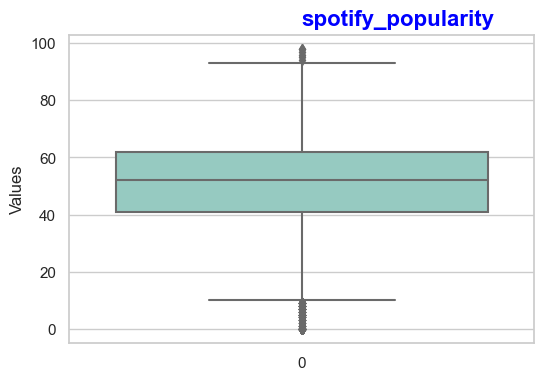

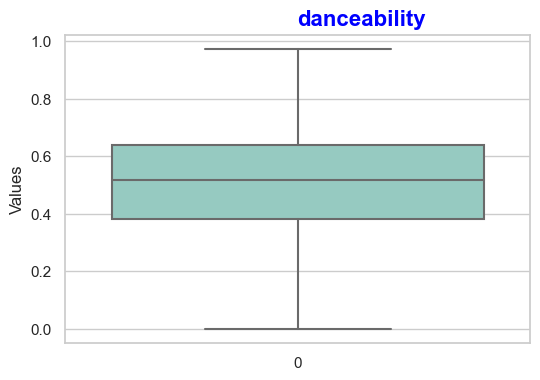

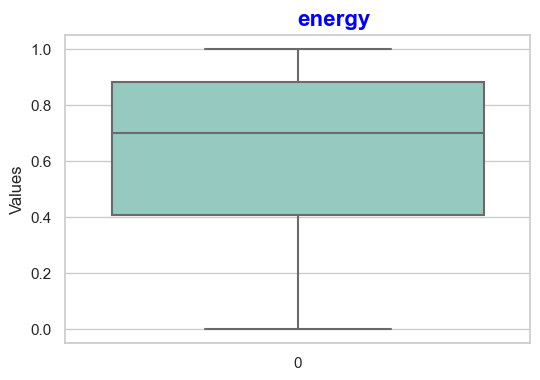

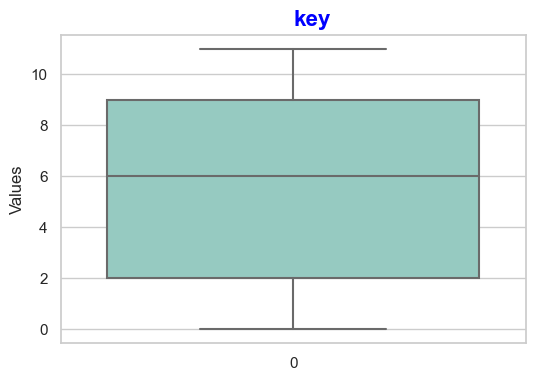

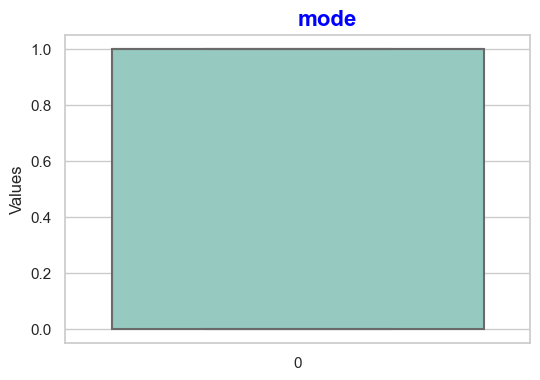

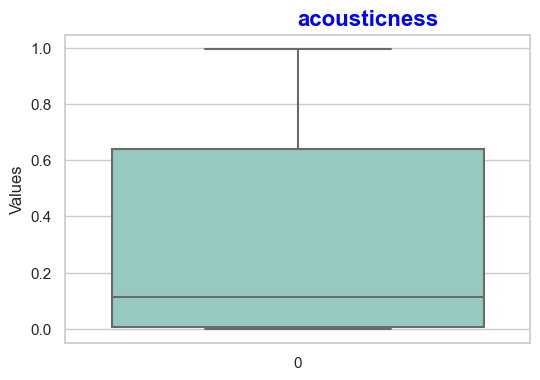

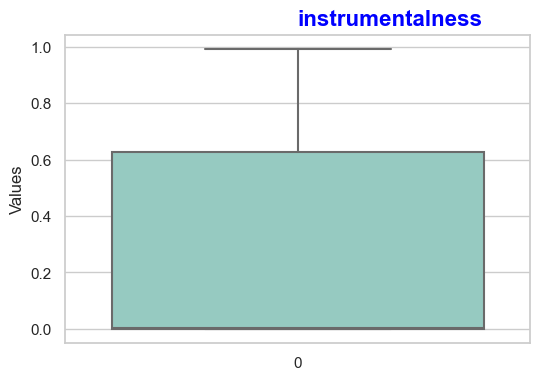

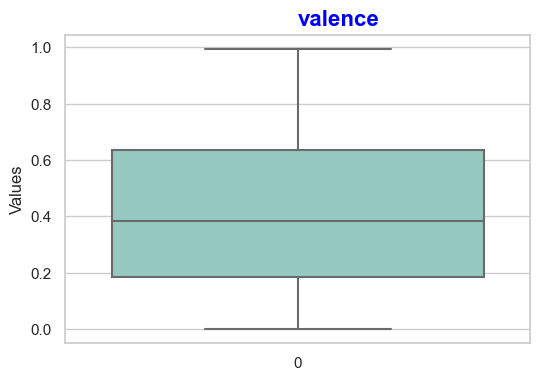

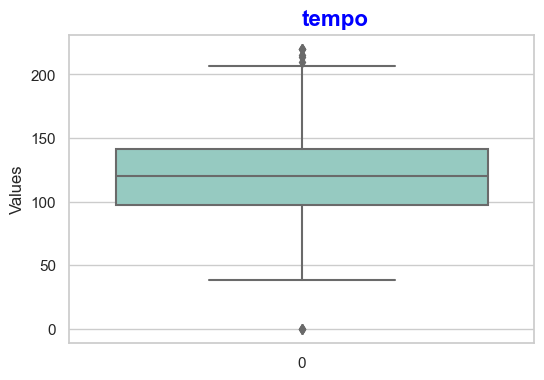

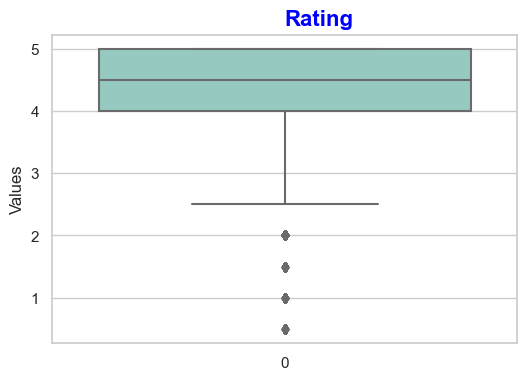

In [21]:
# The numeric columns to create box plots
numeric_columns = ['user_id', 'song_id', 'spotify_popularity', 'danceability', 'energy', 'key', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'Rating']

sns.set(style="whitegrid")

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df[column], palette="Set3")
    plt.xlabel
    plt.ylabel("Values")
    plt.title
    
    # text and set its color
    plt.text(0.5, 1.05, column, transform=plt.gca().transAxes, fontsize=16, color='blue', weight='bold', va='center')
    
    plt.show()

# Density Visualization

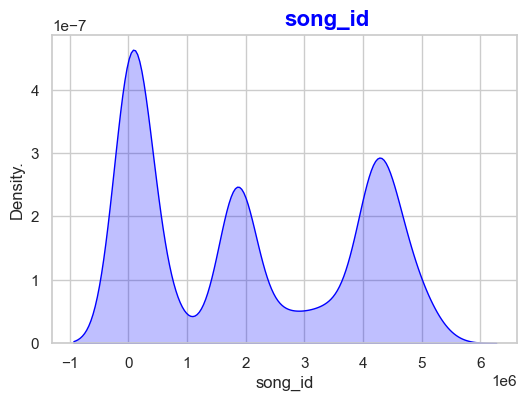

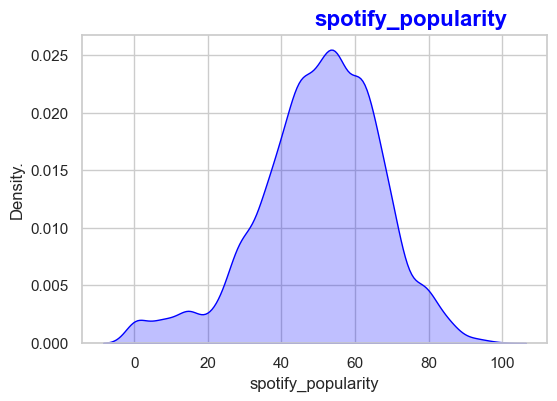

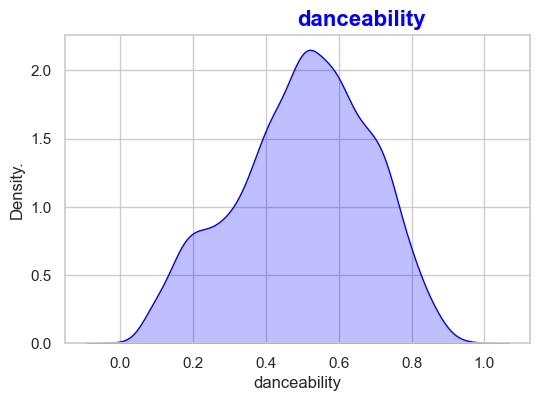

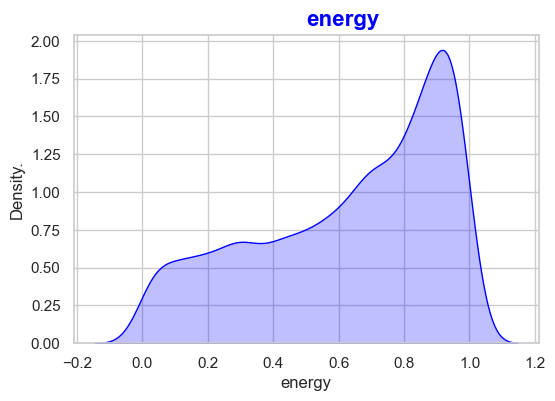

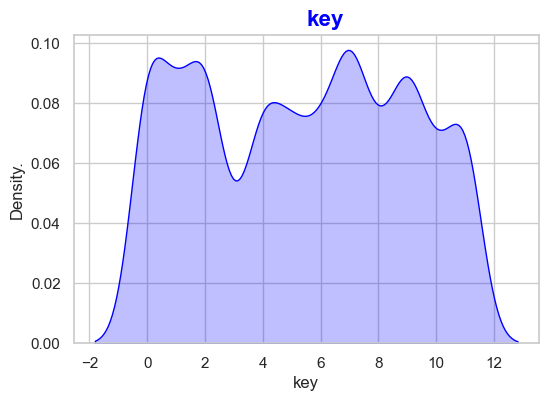

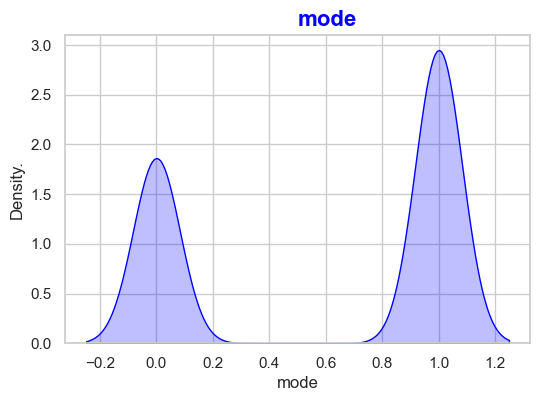

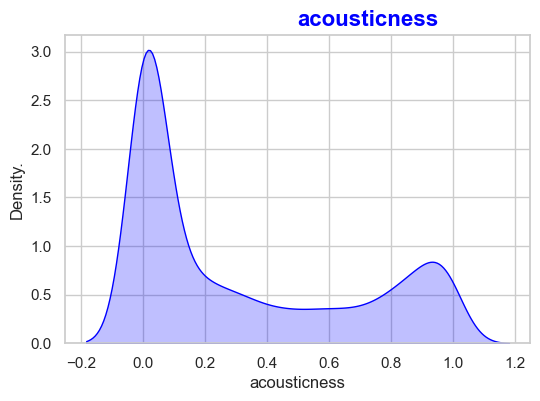

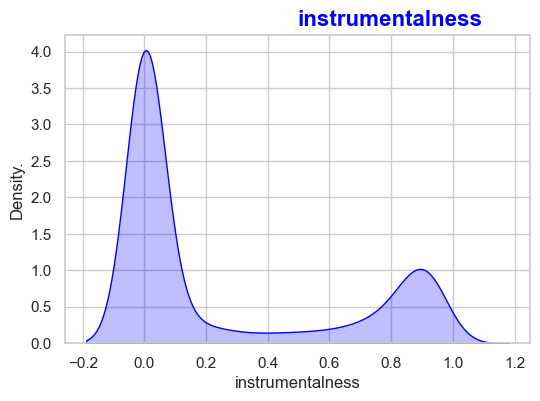

In [22]:
# The numeric columns to create density plots
numeric_columns = ['user_id', 'song_id', 'spotify_popularity', 'danceability', 'energy', 'key', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'Rating']

sns.set(style="whitegrid")

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df[column], color='blue', shade=True)  # Create a density plot
    plt.xlabel
    plt.ylabel("Density.")
    plt.title
    
    # Text and set its color
    plt.text(0.5, 1.05, column, transform=plt.gca().transAxes, fontsize=16, color='blue', weight='bold', va='center')
    
    plt.show()

# Histogram Visualization

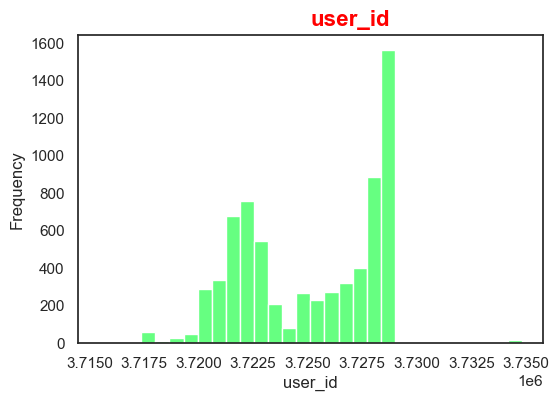

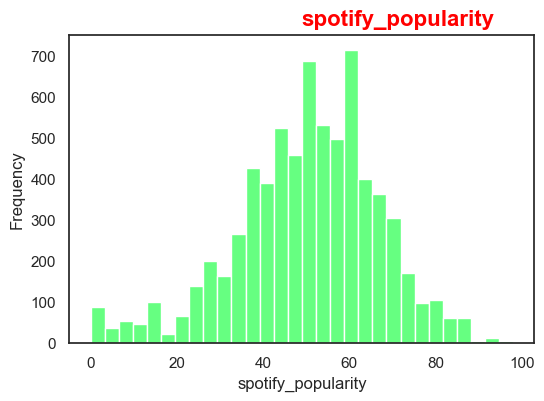

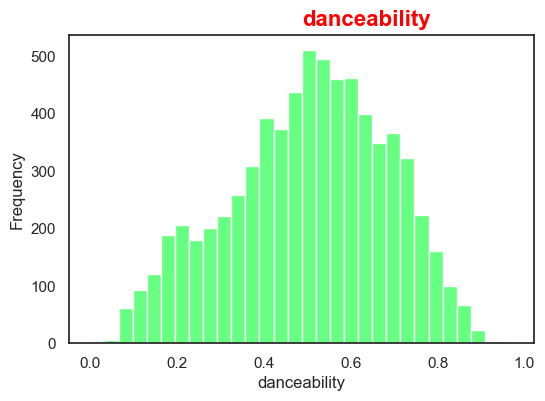

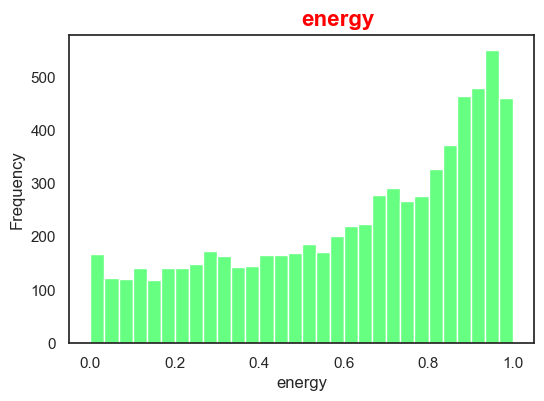

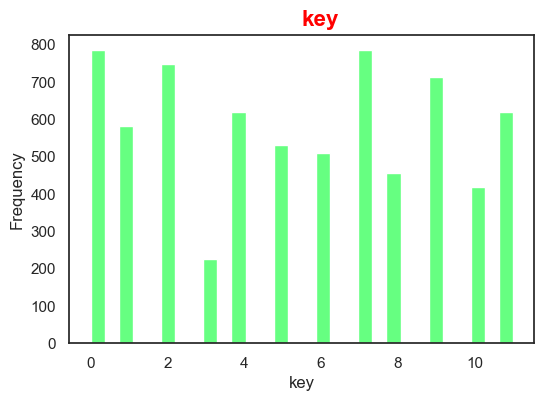

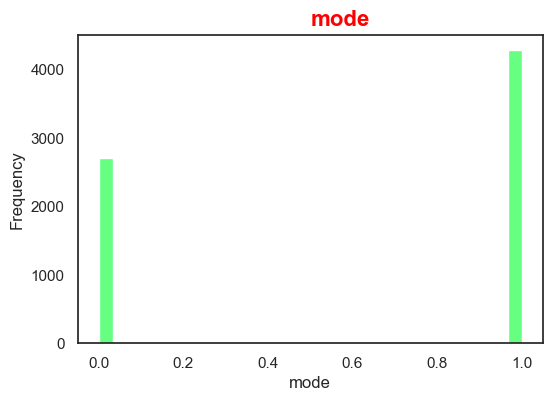

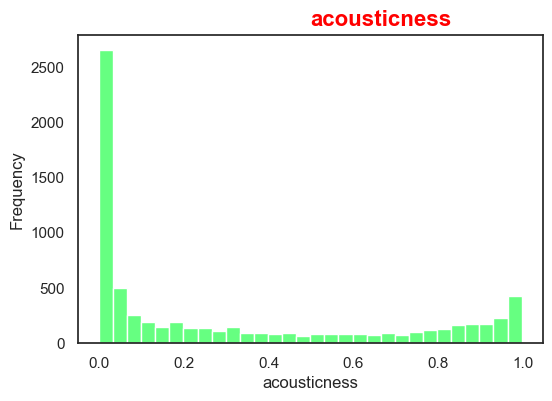

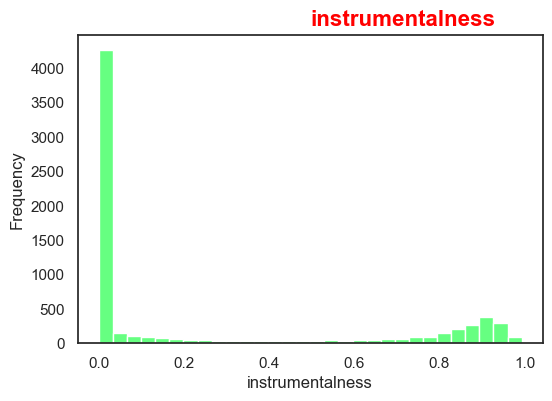

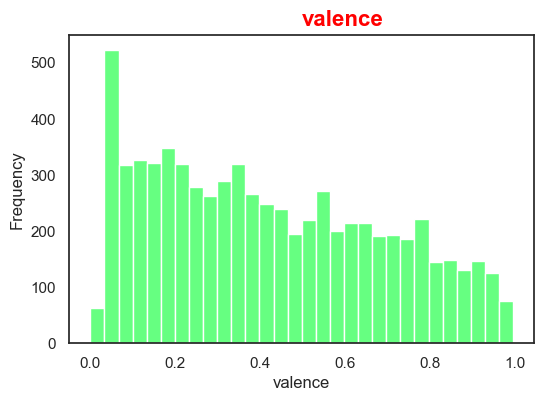

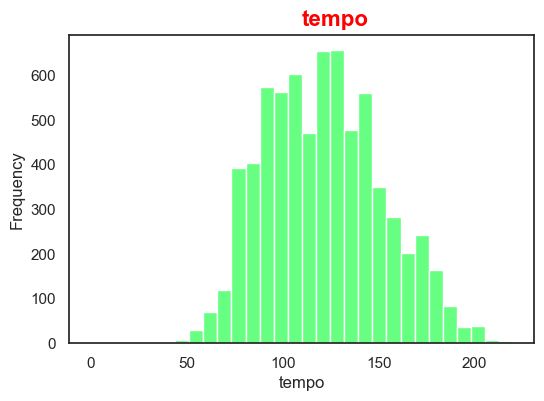

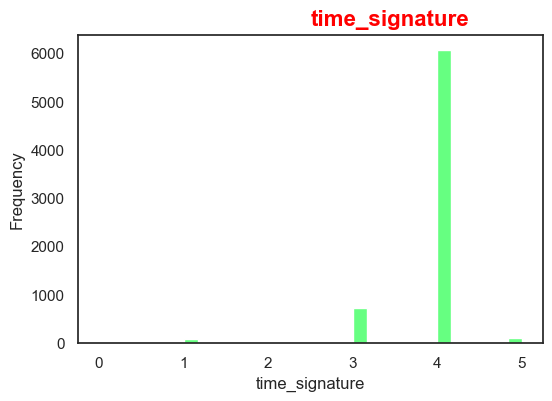

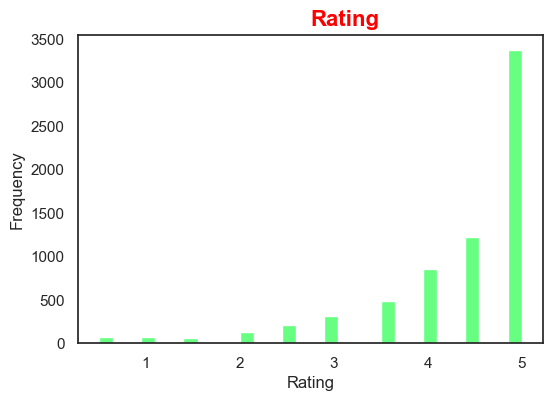

In [23]:
# The numeric columns to create histogram plots 
numeric_columns = ['user_id', 'song_id', 'spotify_popularity', 'danceability', 'energy', 'key', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'Rating']

sns.set(style="white") 

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df[column], color='#33FF57', bins=30)  
    plt.xlabel
    plt.ylabel("Frequency")
    plt.title
    
    plt.text(0.5, 1.05, column, transform=plt.gca().transAxes, fontsize=16, color='red', weight='bold', va='center')
    
    plt.show()

# Feature scaling
### In summary, feature scaling is an essential consideration during EDA, particularly when you intend to use machine learning algorithms that are sensitive to feature scales.

In [19]:
from sklearn.preprocessing import StandardScaler

# list of numeric columns
numeric_columns = [ 'spotify_popularity', 'danceability', 'energy', 'key', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature']

# Extract the numeric columns
data_numeric = music_df[numeric_columns]

# Step 1: Initialize the StandardScaler
scaler = StandardScaler()

# Step 2: Fit the scaler to data and transform the data
data_scaled = scaler.fit_transform(data_numeric)

# Step 3: Replace the original data with the scaled data
music_df[numeric_columns] = data_scaled

In [20]:
music_df[numeric_columns]

spotify_popularity  danceability    energy       key      mode  \
0               2.214270      0.948724 -0.580699 -1.228560 -1.258591   
1              -0.314444     -0.449058 -1.604850 -1.228560  0.794653   
2               0.709083     -0.350777 -0.934812 -1.510146  0.794653   
3               1.311158     -1.289912 -1.974239 -1.510146  0.794653   
4               1.371366      0.632039 -0.643189 -0.946975  0.794653   
...                  ...           ...       ...       ...       ...   
6996            0.347839     -1.688498  1.255831 -1.228560  0.794653   
6997           -1.277763      0.386335  1.207227 -1.228560 -1.258591   
6998            0.648876     -2.043404  1.130850 -0.102219  0.794653   
6999            0.709083      0.342654  0.776736 -1.510146 -1.258591   
7000            0.167216     -0.525500  1.210699 -0.946975  0.794653   

      acousticness  instrumentalness   valence     tempo  time_signature  
0        -0.776818         -0.681118  1.103844 -1.087383        0.270941  
1         1.704009         -0.681106 -0.564840 -1.428214        0.270941  
2        -0.282210         -0.681121 -1.112378 -1.466029        0.270941  
3         1.651154         -0.680930 -1.026709  1.979147       -1.871176  
4         0.438281         -0.681121 -0.937315 -0.040442        0.270941  
...            ...               ...       ...       ...             ...  
6996     -0.866389          1.612032 -1.417807  0.420993        0.270941  
6997     -0.866265         -0.621088 -0.386053 -0.234227        0.270941  
6998     -0.866383         -0.334985 -0.877719  0.849124        0.270941  
6999     -0.862804         -0.678038  0.340272  0.123338        0.270941  
7000     -0.844305         -0.546723 -1.338097  0.124776        0.270941  

[6998 rows x 10 columns]

# Presentation of EDA

In [21]:
import ydata_profiling as pp
import sweetviz as sv


EDA_report=pp.ProfileReport(music_df)
EDA_report.to_file(output_file='model_eda.html')

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.14it/s]


# Model Building

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [23]:
from sklearn.metrics import accuracy_score,roc_auc_score,mean_absolute_percentage_error,mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [24]:
# X and y
X = music_df[['danceability', 'energy', 'key', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature']]
y = music_df['spotify_popularity']

In [25]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression

In [26]:
# Create a Linear Regression model
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X_train, y_train)
y_pred_lr = linear_regression.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_lr)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 0.9556355081954572
Mean Absolute Percentage Error (MAPE): 115.33767839761946


# QQ Plot (Quantile-Quantile Plot)

<Figure size 800x600 with 0 Axes>

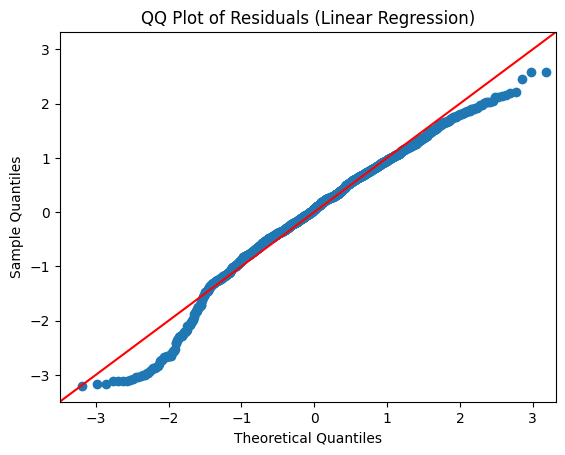

In [27]:
import statsmodels.api as sm

residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_lr, line='45', fit=True)
plt.title("QQ Plot of Residuals (Linear Regression)")
plt.show()

# Model 2: RandomForestRegressor 

In [28]:
# RandomForestRegressor model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 1.0430272790018027
Mean Absolute Error: 0.7931705740532149
Mean Absolute Percentage Error: 182.85146636832502


# Feature Importance Plot

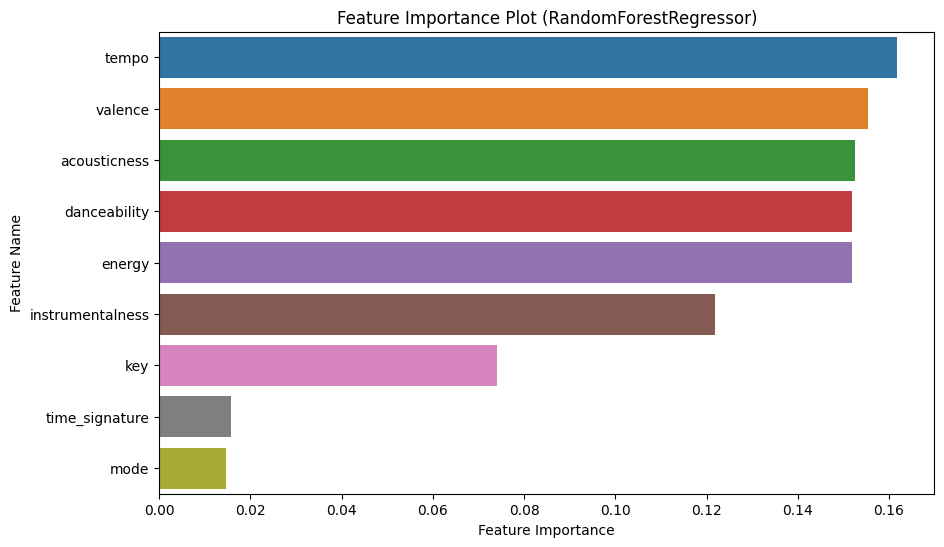

In [29]:
plt.figure(figsize=(10, 6))
feature_importance = random_forest.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]
top_features = X_train.columns[sorted_idx][:10] 
sns.barplot(x=feature_importance[sorted_idx][:10], y=top_features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot (RandomForestRegressor)")
plt.show()

# Model 3: KNeighborsRegressor 

In [30]:
# KNeighborsRegressor model
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_knn)
mae = mean_absolute_error(y_test, y_pred_knn)
mape = mean_absolute_percentage_error(y_test, y_pred_knn)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 1.1049046980949817
Mean Absolute Error: 0.8232081198562602
Mean Absolute Percentage Error: 226.75294444552136


# Residual Plot

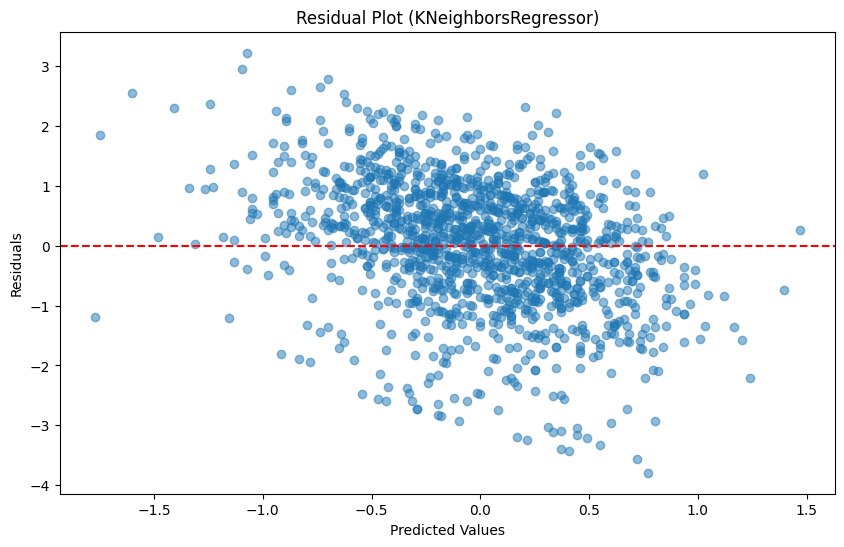

In [31]:
plt.figure(figsize=(10, 6))
residuals_knn = y_test - y_pred_knn
plt.scatter(y_pred_knn, residuals_knn, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (KNeighborsRegressor)")
plt.show()

# Model 4: DecisionTreeRegressor

In [32]:
# DecisionTreeRegressor model
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
mape = mean_absolute_percentage_error(y_test, y_pred_dt)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 1.970114256601907
Mean Absolute Error: 1.081264318730795
Mean Absolute Percentage Error: 450.2112070185178


# Feature Importances: Visualize the importance of each feature in the decision tree.

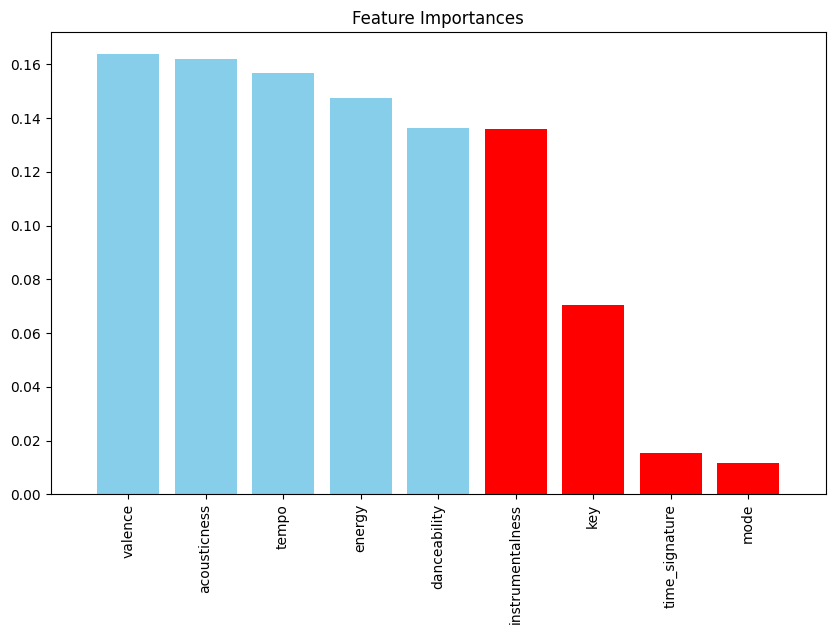

In [33]:
importances = decision_tree_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

colors = ['skyblue' if i < 5 else 'red' for i in range(X.shape[1])]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center", color=colors)
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Model 5: XGBRegressor

In [34]:
# XGBRegressor model
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_regressor.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error:", mape)

Mean Squared Error: 1.1057846741869508
Mean Absolute Error: 0.8226957861657054
Mean Absolute Percentage Error: 226.31184886679995


# Actual vs. Predicted Values (Colored by Residuals)

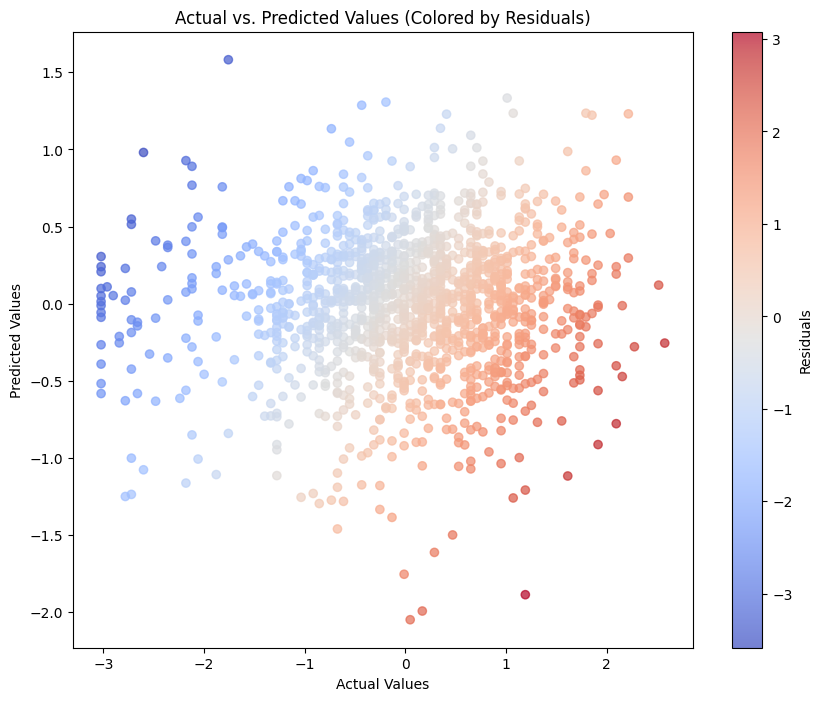

In [35]:
residuals = y_test - y_pred_xgb
color_map = plt.get_cmap('coolwarm', len(residuals))

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_xgb, c=residuals, cmap=color_map, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Colored by Residuals)")
cbar = plt.colorbar()
cbar.set_label("Residuals")
plt.show()

# Final Model To Recommend Top 10 Songs For Users 

# User and Genre recommendation

In [36]:
# Importing Libraries
import math
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

In [37]:
# Remove Duplicate Entries:
music_df.drop_duplicates(subset=['user_id', 'song_id'], inplace=True)
user_item_matrix = music_df.pivot(index='user_id', columns='song_id', values='Rating').fillna(0)

In [38]:
# Create User-Item Matrix
user_item_matrix = music_df.pivot(index='user_id', columns='song_id', values='Rating').fillna(0)

In [39]:
# Aggregate Duplicate Entries:
user_item_matrix = music_df.groupby(['user_id', 'song_id'])['Rating'].mean().unstack().fillna(0)

In [40]:
# Calculate Similarity Matrix
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.4730295,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.4730295, 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

In [41]:
unique_user_ids = music_df['user_id'].unique()
print("Unique User IDs in the Dataset:", unique_user_ids)

Unique User IDs in the Dataset: [ 12  13  20  21  22  23  16  19  24  26  25  18  27  28  29  30  31  32
  34  10  35  36  37  38  39  40  41  42  44  14  11  45  47  43  48  49
  51  52  53  54  50  55   3  56  57  58  59  60  61  62  63  15  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  46  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 136 137
 135 138 139 140 141 142 144 143 145 146 147 149 150 151 148 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 172 173
 174 171 175 176 177 178 179 180 181   2 182 665 183 184 185 186 187 188
 190 191 192 193 189 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 24

# User's similarity vector to all other users

In [42]:
def recommend_songs(user_id, user_item_matrix, user_similarity, track_genre, music_df, num_recommendations=10):
    # Get the user's similarity vector to all other users
    user_similarities = user_similarity[user_id]
    
    # Find the users most similar to the target user
    similar_users = np.argsort(user_similarities)[::-1] 
    
    recommendations = []
    
    for user in similar_users:
        if user == user_id:
            continue    

        similar_user_ratings = user_item_matrix.loc[user]
        genre_condition = (music_df['track_genre'] == track_genre) & (similar_user_ratings > 0)
        genre_songs = similar_user_ratings[genre_condition]
        
        # Exclude songs already rated by the target user
        unrated_songs = genre_songs[~genre_songs.index.isin(user_item_matrix.columns[user_item_matrix.loc[user_id] > 0])]
        
        # Add the unrated songs along with their ratings to recommendations
        for song_id, rating in unrated_songs.items():
            recommendations.append((song_id, rating))

        top_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:num_recommendations]
    
    # Extract the song names corresponding to the song IDs
    recommended_songs = [(music_df[music_df['song_id'] == song_id]['track_name'].values[0], rating) for song_id, rating in top_recommendations]
    
    return recommended_songs
        

# Recommended songs for User's

In [43]:
user_id_to_recommend = 117  
track_genre_to_recommend = 'acoustic' 

recommended_tracks = recommend_songs(user_id_to_recommend, user_item_matrix, user_similarity, track_genre_to_recommend, music_df, num_recommendations=10)

print("Recommended songs for User {} in the {} genre:".format(user_id_to_recommend, track_genre_to_recommend))
for i, (track_name, rating) in enumerate(recommended_tracks, start=1):
    print("{}. {}, Rating:  {}".format(i, track_name, rating))


Recommended songs for User 117 in the acoustic genre:
1. Mujer con Abanico, Rating:  5.0
2. Fallen Star, Rating:  5.0
3. Bouncing Bona, Rating:  5.0
4. そういえば今日から化け物になった, Rating:  5.0
5. 2002 - Acoustic, Rating:  5.0
6. death bed (coffee for your head), Rating:  5.0
7. My Baby's Cheating - I Sure Got the Feeling, Rating:  5.0
8. death bed (coffee for your head), Rating:  5.0
9. Disco Ball, Rating:  5.0
10. Ghost - Acoustic, Rating:  5.0
